# Things to note

### mention computational cost and reduction of memory requirements, to specify what is meant by efficiency
### reduce number of words in the conclusion, use the most accurate language



## Week 5 Excercises - 18003453

In this notebook the utility of PCA compenents is explored. Intially a simple neural network is created and trained on the training images of the MNIST training dataset. The training dataset is then broken down into PCA components for later use. 

The utility of PCA components is explored by testing a trained neural network on data that has been recreated with varying PCA components to see how many PCA components gives a good reflection of the original dataset. This is then brought further by retraining the neural network on training data that has been recreated using initally 100 PCA components and then afterwards 20 PCA components. This explores how well PCA components can be employed to decrease the data required for representing and working with data sets and yet still garner the same results as if we had used the original complete dataset. This allows use to find efficiencies in the machine learning that may be employed to create better models.

In [62]:
#importing modules
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
from scipy import linalg
import tensorflow as tf
from tensorflow import keras


mpl.rcParams.update({'font.size': 10})
mpl.rcParams['figure.dpi']=200

#ignore warnings as code runs
import warnings
warnings.filterwarnings("ignore")
plt.rcParams.update({'figure.max_open_warning': 0})


### 1) Creating a network and training it on the MNIST dataset

In [1]:
#importing MNIST data set
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#normalising
train_images = train_images/255
test_images = test_images/255

#fixing dimensionality
train_images, test_images = train_images[...,np.newaxis], test_images[...,np.newaxis]

#creating the network
model = keras.Sequential([
    keras.layers.Conv2D(10,3,input_shape=(28,28,1),activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(10)])

model.summary()

NameError: name 'keras' is not defined

In [43]:
#compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#training the model
history = model.fit(train_images, train_labels, epochs=5)

#storing the accuracy of the model
accuracy1 = history.history['accuracy']

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0315 - accuracy: 0.9907
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0279 - accuracy: 0.9910
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0270 - accuracy: 0.9927
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0193 - accuracy: 0.9939
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0177 - accuracy: 0.9944


### 2) Decomposing the training dataset into PCA Components

In [4]:
#decomposing training dataset into MNIST components
print("train_images.shape: ",np.shape(train_images))
X1=np.reshape(train_images,(60000,784))
print("X1.shape:",np.shape(X1))
mu1=np.mean(X1,axis=0)
x1=X1-mu1
rho1=np.cov(x1,rowvar=False) #creating covariance matrix
print("rh1o.shape:",np.shape(rho1))

#get the eigenvalues and vectors
vals1,vecs1=linalg.eigh(rho1)
print("vecs1.shape:",np.shape(vecs1))
print("vals1.shape:",np.shape(vals1))
vecs1=np.flip(vecs1)
vals1=np.flip(vals1)



train_images.shape:  (60000, 28, 28, 1)
X1.shape: (60000, 784)
rh1o.shape: (784, 784)
vecs1.shape: (784, 784)
vals1.shape: (784,)


### 3) Decomposing the testing dataset into PCA components, rebuilding from N-components and then testing against the trained network for varying N components

The first interesting feature we explore is by breaking down the MNIST testing data set into PCA components and then recreating this testing dataset using a varying number the best PCA components. Each of these varying datasets are then used to test the neural network and the results of the accuracy against the number of PCA componenets used to created each dataset is plotted on a graph.

This allows us to see how well the original testing data set is represented by using different numbers of PCA components to recreate it. The higher the accuracy the more similar the dataset to the original.

In [8]:
#decomposing testing dataset into MNIST components
print("test_images.shape: ",np.shape(test_images))
X2=np.reshape(test_images,(10000,784))
print("X2.shape:",np.shape(X2))
mu2=np.mean(X2,axis=0)
x2=X2-mu2
rho2=np.cov(x2,rowvar=False) #creating covariance matrix
print("rho2.shape:",np.shape(rho2))

#Get the eigenvalues and vectors
vals2,vecs2=linalg.eigh(rho2)
print("vecs2.shape:",np.shape(vecs2))
print("vals2.shape:",np.shape(vals2))
vecs2=np.flip(vecs2)
vals2=np.flip(vals2)
P2=np.dot(x2,vecs2)  #useful when rebuilding

test_images.shape:  (10000, 28, 28, 1)
X2.shape: (10000, 784)
rho2.shape: (784, 784)
vecs2.shape: (784, 784)
vals2.shape: (784,)


The number that should be shown below is: 1


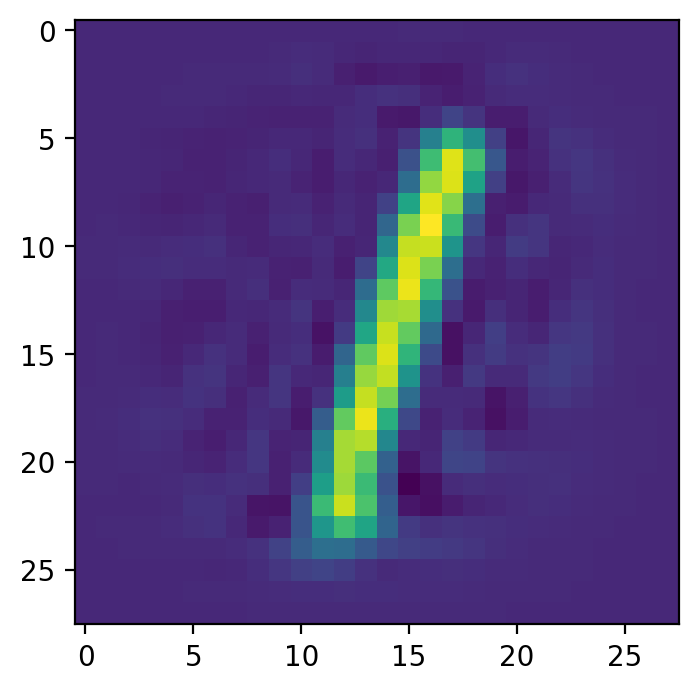

In [29]:
#printing out a random number for testing purposes
n = 90
n_PCA_data2 = (np.dot(P2[:,0:n],vecs2.T[0:n,:]))+mu2   #placing components together
test_images_recreate2 = (np.reshape(n_PCA_data2,(10000,28,28)))[...,np.newaxis]  #reshaping

#plotting a sample image from n PCA components
plt.plot()
plt.imshow(test_images_recreate2[5,:,:])
print('The number that should be shown below is:',test_labels[5])

In [10]:
def collate_PCA(n_PCA,P,vecs,mu):
    """
    Function that recreates data samples from its own PCA components.
    Inputs
    n: number in PCA components used for reconstruction
    P: projection operator for eigenvectors
    vecs: eigenvectors matrix
    Returns
    test_images_recreate: array of the collated images using PCA components"""
    
    n_PCA_data = (np.dot(P[:,0:n_PCA],vecs.T[0:n_PCA,:]))+mu   #placing components together
    
    images_rct = (np.reshape(n_PCA_data,(len(P),28,28)))[...,np.newaxis]  #reshaping
    
    return images_rct

In [33]:
#recreate the test data using Nbest components
n_intervals2 = 30  #number of different values of N PCA components to plot
n_max = 300 #maximum number of PCA components included
loss_arr1 = np.zeros(n_intervals2)
acc_arr1 = np.zeros(n_intervals2)
num_arr1 = np.linspace(1,n_max,n_intervals2, dtype=int)


#testing over different numbers PCA components
for i in range(n_intervals2):
    test_images_rct1 = collate_PCA(num_arr1[i],P2,vecs2,mu2)
    loss_arr1[i], acc_arr1[i] = model.evaluate(test_images_rct1,  test_labels, verbose=2) #testing

313/313 - 1s - loss: 2.4081 - accuracy: 0.1161
313/313 - 1s - loss: 1.2949 - accuracy: 0.5741
313/313 - 1s - loss: 0.6216 - accuracy: 0.7969
313/313 - 1s - loss: 0.4520 - accuracy: 0.8564
313/313 - 1s - loss: 0.3104 - accuracy: 0.9021
313/313 - 1s - loss: 0.2287 - accuracy: 0.9271
313/313 - 1s - loss: 0.1756 - accuracy: 0.9479
313/313 - 1s - loss: 0.1381 - accuracy: 0.9605
313/313 - 1s - loss: 0.1197 - accuracy: 0.9653
313/313 - 1s - loss: 0.1048 - accuracy: 0.9698
313/313 - 1s - loss: 0.0939 - accuracy: 0.9728
313/313 - 1s - loss: 0.0882 - accuracy: 0.9738
313/313 - 1s - loss: 0.0843 - accuracy: 0.9754
313/313 - 1s - loss: 0.0788 - accuracy: 0.9775
313/313 - 1s - loss: 0.0765 - accuracy: 0.9780
313/313 - 1s - loss: 0.0750 - accuracy: 0.9786
313/313 - 1s - loss: 0.0738 - accuracy: 0.9784
313/313 - 1s - loss: 0.0732 - accuracy: 0.9787
313/313 - 1s - loss: 0.0719 - accuracy: 0.9791
313/313 - 1s - loss: 0.0704 - accuracy: 0.9806
313/313 - 1s - loss: 0.0689 - accuracy: 0.9807
313/313 - 1s 

Text(0.5, 1.0, 'Plot of val-accuracy of network against increasing # of PCA components')

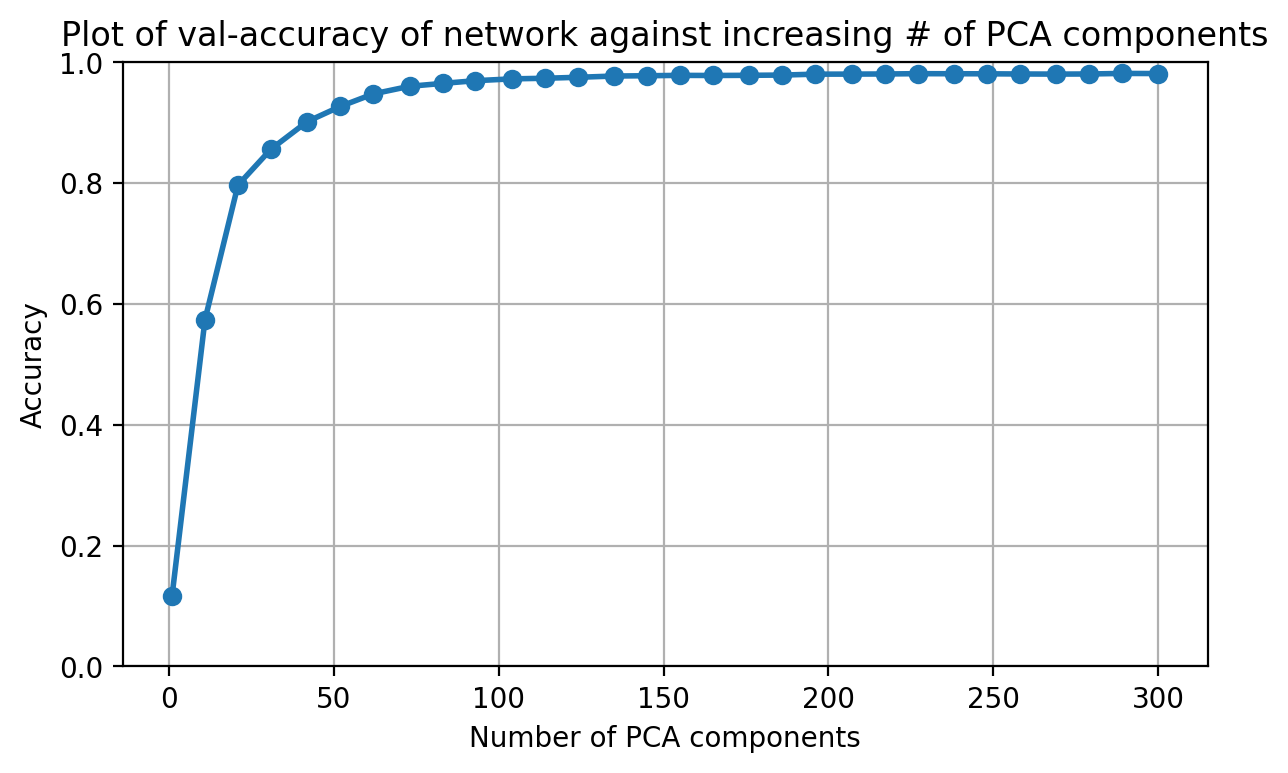

In [52]:
#plotting test data
fig,ax = plt.subplots(figsize=(7,4))
ax.plot(num_arr1,acc_arr1,'-o', linewidth=2)
ax.set_xlabel("Number of PCA components")
ax.set_ylabel("Accuracy")
ax.set_ylim([0,1])
ax.grid()
ax.set_title('Plot of val-accuracy of network against increasing # of PCA components')

The graph above has only been plotted to 300 PCA components as including all 784 does not show anymore useful data and infact obscures the more interesting parts of the graph.

It is possible to see in the graph above that by using more than around 75 PCA components to represent the dataset we gain increasingly insiginficant improvements in the accuracy of the neural network, suggesting there is increasingly smaller differences between the recreated testing dataset and the original dataset.

### 4) Creating new data set from 100 best PCA components of the broken down training dataset and retraining the NN

In this part of the notebook the neural network is retrained on a new training dataset and then tested again in the same fashion as before. This new training dataset is created from the 100 best PCA components of the original training dataset. The results from this can be compared to the previous graph to allow us to see how well the 100n best PCA components represents the training dataset and as a result how similarly the neural network is trained. This can be seen by how similar the results we get are.

The number that should be shown belwo is: 3


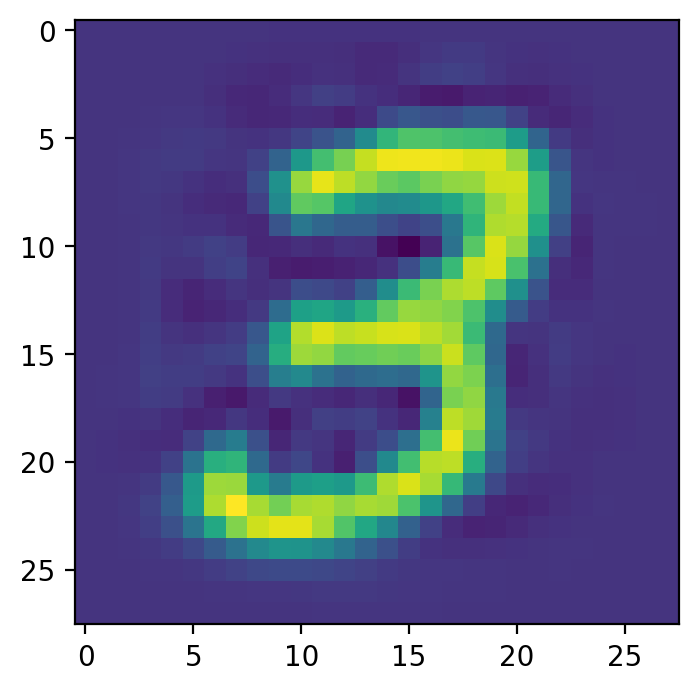

In [19]:
#recreating the training dataset from 100 PCA components
P1=np.dot(x1,vecs1)
n1 = 100
n_PCA_data1 = (np.dot(P1[:,0:n1],vecs1.T[0:n1,:]))+mu1   #placing components together
train_images_rct1 = (np.reshape(n_PCA_data1,(len(P1),28,28)))[...,np.newaxis]  #reshaping

#plotting a sample image to test this worked
plt.plot()
plt.imshow(train_images_rct1[7,:,:])
print('The number that should be shown below is:',train_labels[7])

In [45]:
#recompiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#retraining the model
history = model.fit(train_images_rct1, train_labels, epochs=5)

#storing the accuracy of the model
accuracy2 = history.history['accuracy']

Epoch 1/5
1875/1875 [==============================] - 19s 8ms/step - loss: 0.0565 - accuracy: 0.9830
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0350 - accuracy: 0.9894
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0335 - accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0335 - accuracy: 0.9892
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0284 - accuracy: 0.9914


### 5) Testing the rebuilt test dataset against the trained network for varying N PCA components used in the test Dataset

The testing dataset has already been broken down into PCA components and so does not need to be broken down again. The variables are established again here for easy modifcation of the testing.

In [22]:
#recreate the test data using Nbest components
n_intervals2 = 30  #number of different values of N PCA components to plot
n_max = 300 #maximum number of PCA components included
loss_arr2 = np.zeros(n_intervals2)
acc_arr2 = np.zeros(n_intervals2)
num_arr2 = np.linspace(1,n_max,n_intervals2, dtype=int)


#testing over different numbers PCA components
for i in range(n_intervals2):
    test_images_rct2 = collate_PCA(num_arr2[i],P2,vecs2,mu2)
    loss_arr2[i], acc_arr2[i] = model.evaluate(test_images_rct2,  test_labels, verbose=2) #testing

313/313 - 1s - loss: 3.4813 - accuracy: 0.1552
313/313 - 1s - loss: 1.6021 - accuracy: 0.5059
313/313 - 1s - loss: 0.7222 - accuracy: 0.7595
313/313 - 1s - loss: 0.3405 - accuracy: 0.8896
313/313 - 1s - loss: 0.1687 - accuracy: 0.9456
313/313 - 1s - loss: 0.1162 - accuracy: 0.9634
313/313 - 1s - loss: 0.0898 - accuracy: 0.9722
313/313 - 1s - loss: 0.0722 - accuracy: 0.9765
313/313 - 1s - loss: 0.0647 - accuracy: 0.9786
313/313 - 1s - loss: 0.0615 - accuracy: 0.9807
313/313 - 1s - loss: 0.0599 - accuracy: 0.9818
313/313 - 1s - loss: 0.0614 - accuracy: 0.9820
313/313 - 1s - loss: 0.0615 - accuracy: 0.9817
313/313 - 1s - loss: 0.0617 - accuracy: 0.9808
313/313 - 1s - loss: 0.0628 - accuracy: 0.9807
313/313 - 1s - loss: 0.0635 - accuracy: 0.9799
313/313 - 1s - loss: 0.0647 - accuracy: 0.9803
313/313 - 1s - loss: 0.0660 - accuracy: 0.9795
313/313 - 1s - loss: 0.0681 - accuracy: 0.9796
313/313 - 1s - loss: 0.0690 - accuracy: 0.9799
313/313 - 1s - loss: 0.0699 - accuracy: 0.9796
313/313 - 1s 

Text(0.5, 1.0, 'Plot of val-accuracy of network against increasing # of PCA components from retrained NN')

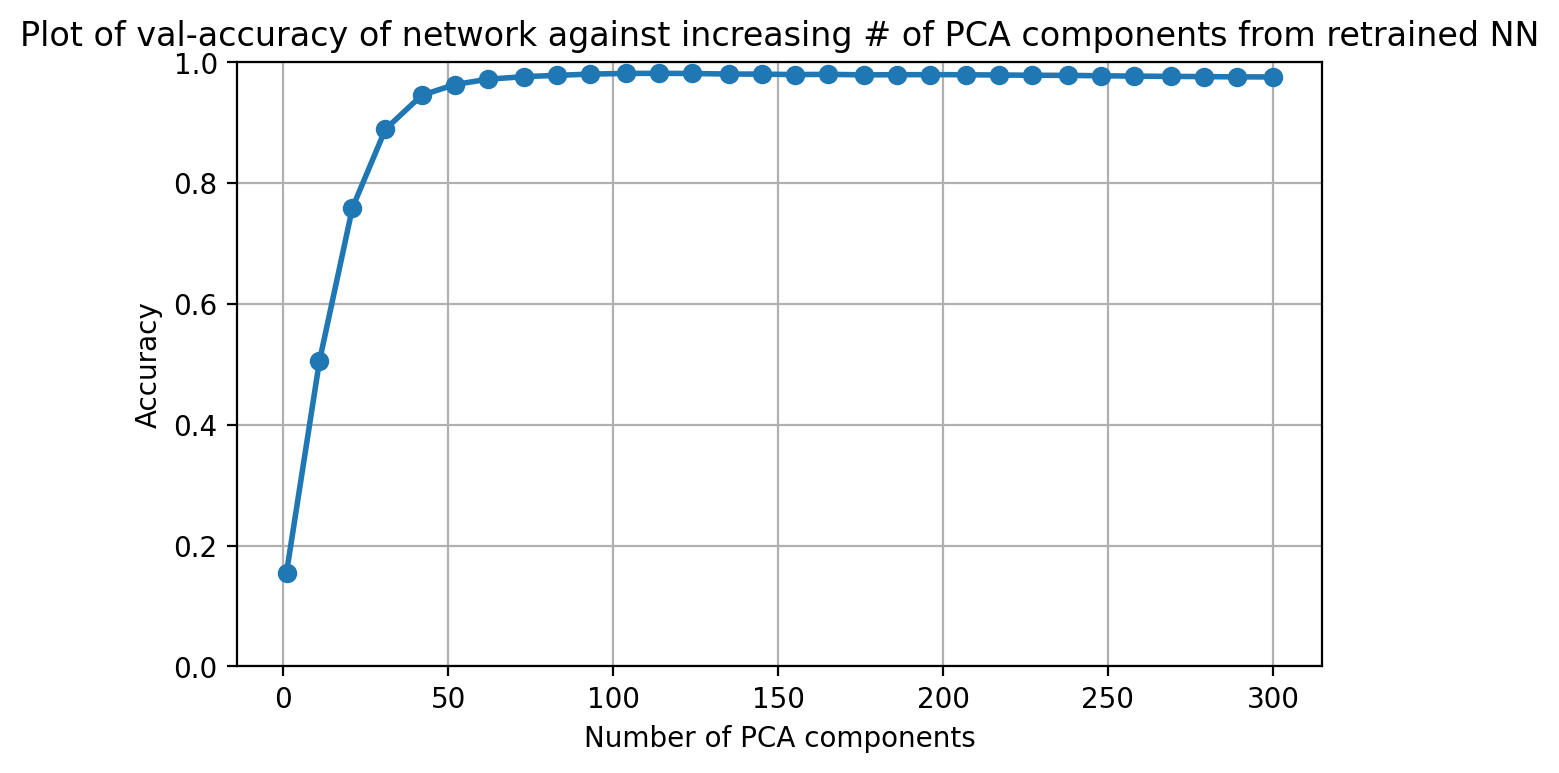

In [50]:
#plotting test data
fig,ax = plt.subplots(figsize=(7,4))
ax.plot(num_arr2,acc_arr2,'-o', linewidth=2)
ax.set_xlabel("Number of PCA components")
ax.set_ylabel("Accuracy")
ax.set_ylim([0,1])
ax.grid()
ax.set_title('Plot of val-accuracy of network against increasing # of PCA components from retrained NN')

This graph seems to be similar to the graph above however it seems to give a good approximation of the original test dataset with only 50 PCA components used.

### 6) Training a network on the rebuilt from 20 best components training dataset and then testing the rebuilt test dataset against it for vary N components creating the test dataset

The number that should be shown below is: 3


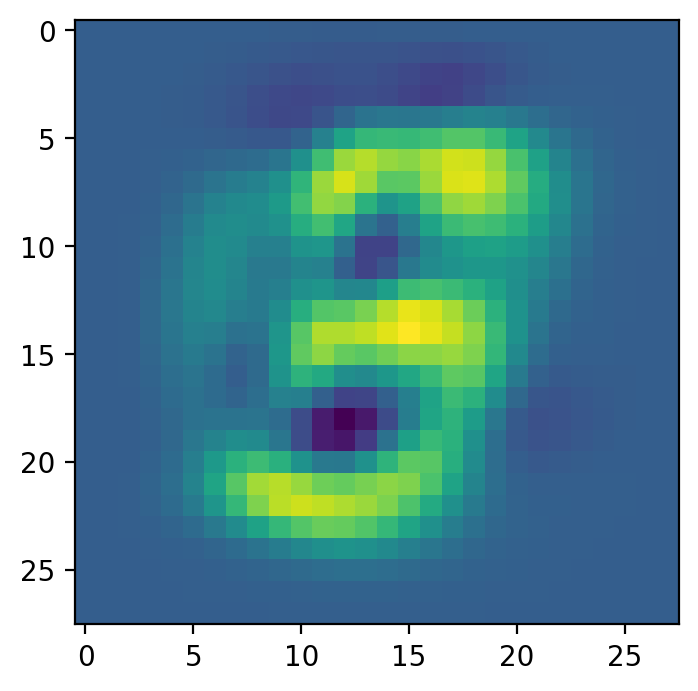

In [24]:
#recreating the training dataset from 20 PCA components
P1=np.dot(x1,vecs1)
n3 = 20
n_PCA_data3 = (np.dot(P1[:,0:n3],vecs1.T[0:n3,:]))+mu1   #placing components together
train_images_rct2 = (np.reshape(n_PCA_data3,(len(P1),28,28)))[...,np.newaxis]  #reshaping

#plotting a sample image to test this worked
plt.plot()
plt.imshow(train_images_rct2[7,:,:])
print('The number that should be shown below is:',train_labels[7])

In [46]:
#recompiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#retraining the model for 20 PCA components
history = model.fit(train_images_rct2, train_labels, epochs=5)

#storing the accuracy of the model
accuracy3 = history.history['accuracy']

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1775 - accuracy: 0.9425
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1129 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1016 - accuracy: 0.9688
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0998 - accuracy: 0.9692
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0945 - accuracy: 0.9704


In [27]:
#recreate the test data using Nbest components
n_intervals2 = 60  #number of different values of N PCA components to plot
n_max = 300 #maximum number of PCA components included
loss_arr3 = np.zeros(n_intervals2)
acc_arr3 = np.zeros(n_intervals2)
num_arr3 = np.linspace(1,n_max,n_intervals2, dtype=int)


#testing over different numbers PCA components
for i in range(n_intervals2):
    test_images_rct3 = collate_PCA(num_arr3[i],P2,vecs2,mu2)
    loss_arr3[i], acc_arr3[i] = model.evaluate(test_images_rct3,  test_labels, verbose=2) #testing

313/313 - 1s - loss: 4.9505 - accuracy: 0.1008
313/313 - 1s - loss: 2.3906 - accuracy: 0.4133
313/313 - 1s - loss: 0.9459 - accuracy: 0.7020
313/313 - 1s - loss: 0.2861 - accuracy: 0.9103
313/313 - 1s - loss: 0.1400 - accuracy: 0.9569
313/313 - 1s - loss: 0.1582 - accuracy: 0.9553
313/313 - 1s - loss: 0.1948 - accuracy: 0.9432
313/313 - 1s - loss: 0.1751 - accuracy: 0.9509
313/313 - 1s - loss: 0.1823 - accuracy: 0.9467
313/313 - 1s - loss: 0.2049 - accuracy: 0.9435
313/313 - 1s - loss: 0.2129 - accuracy: 0.9420
313/313 - 1s - loss: 0.2204 - accuracy: 0.9406
313/313 - 1s - loss: 0.2357 - accuracy: 0.9422
313/313 - 1s - loss: 0.2465 - accuracy: 0.9374
313/313 - 1s - loss: 0.2485 - accuracy: 0.9374
313/313 - 1s - loss: 0.2581 - accuracy: 0.9373
313/313 - 1s - loss: 0.2649 - accuracy: 0.9362
313/313 - 1s - loss: 0.2767 - accuracy: 0.9338
313/313 - 1s - loss: 0.2861 - accuracy: 0.9344
313/313 - 1s - loss: 0.2922 - accuracy: 0.9324
313/313 - 1s - loss: 0.3005 - accuracy: 0.9314
313/313 - 1s 

Text(0.5, 1.0, 'Plot of val-ccuracy against increasing # of PCA components from retrained NN of 20 best PCA')

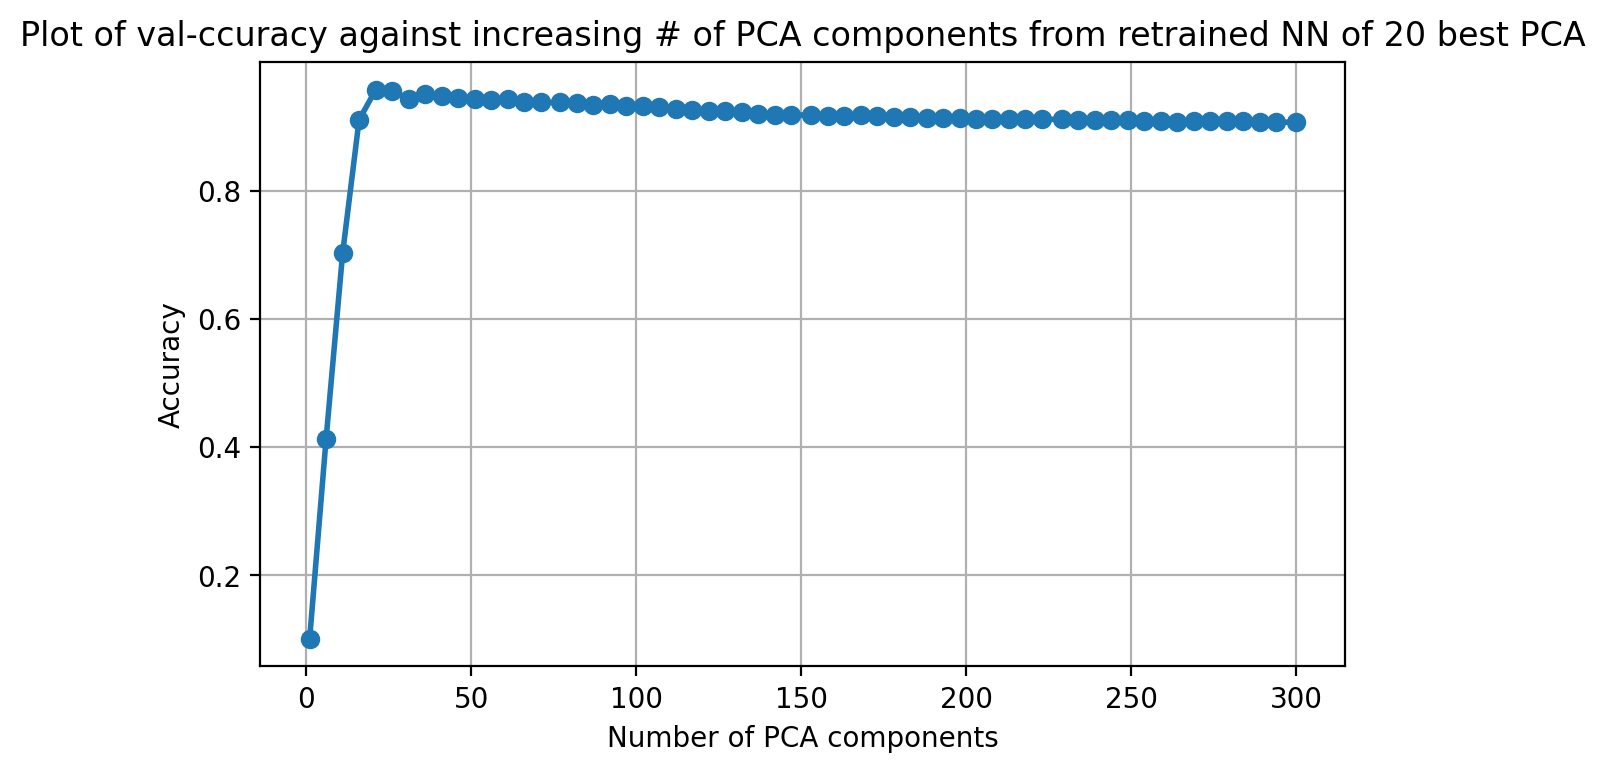

In [48]:
#plotting test data
fig,ax = plt.subplots(figsize=(7,4))
ax.plot(num_arr3,acc_arr3,'-o', linewidth=2)
ax.set_xlabel("Number of PCA components")
ax.set_ylabel("Accuracy")
ax.grid()
ax.set_title('Plot of val-ccuracy against increasing # of PCA components from retrained NN of 20 best PCA')

### Comparison

Below I have plotted all 3 graphs on one plot for comparison.

The accuracy of the NN trained on the train_images dataset is: 0.993
The accuracy of the NN trained on the 100 best PCA components of the train_images dataset is: 0.991
The accuracy of the NN trained on the 20 best PCA components of thetrain_images dataset is: 0.97


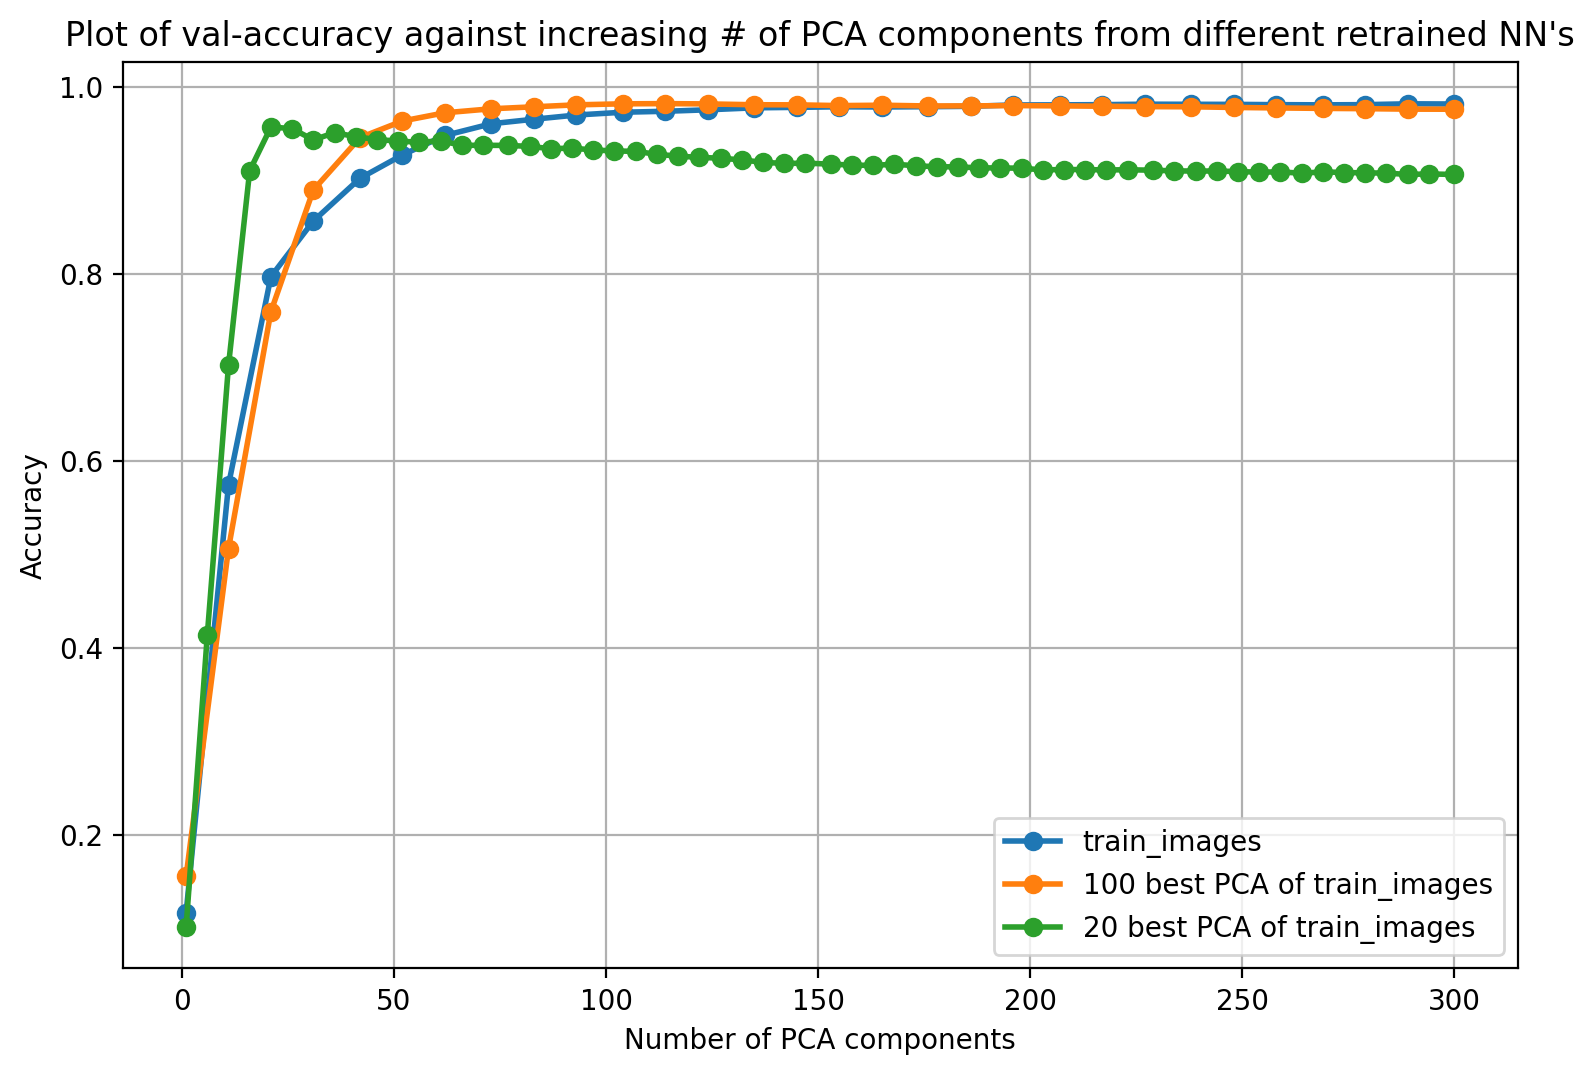

In [61]:
#plotting test data
fig,ax = plt.subplots(figsize=(9,6))
ax.plot(num_arr1,acc_arr1,'-o', linewidth=2,label=('train_images'))
ax.plot(num_arr2,acc_arr2,'-o', linewidth=2,label=('100 best PCA of train_images'))
ax.plot(num_arr3,acc_arr3,'-o', linewidth=2,label=('20 best PCA of train_images'))
ax.set_xlabel("Number of PCA components")
ax.set_ylabel("Accuracy")
ax.grid()
ax.legend()
ax.set_title("Plot of val-accuracy against increasing # of PCA components from different retrained NN's")

#printing out the accuracy of each NN for different training data
print("The accuracy of the NN trained on the train_images dataset is:",
      np.around(accuracy1[4],decimals =3))
print("The accuracy of the NN trained on the 100 best PCA components of the train_images dataset is:", 
      np.around(accuracy2[4],decimals =3))
print("The accuracy of the NN trained on the 20 best PCA components of thetrain_images dataset is:",
      np.around(accuracy3[4],decimals =3))


The legend refers to the data on which each of neural networks were trained.

### Conclusion

It is possible to see from the data shown above that the accuracy of the NN decreases slightly when going from training on the full dataset to that of the 100 best PCA components, 0.993 to 0.991. However when moving from training the NN on the 100 best PCA to the 20 best PCA this accuracy drops from 0.991 to 0.97 which is a more significant drop although extremely large. This means for less best PCA components used the less accurate the NN can be as it has less variation to train from, however this does mean the NN can train of singificantly reduced data and so is more efficient.

The graphs above shows the the NN trained on original data has a significantly increasing accuracy until around 80 PCA compenents are included in the testing dataset, whereas the NN trained on the 100 best approaches its max accuracy more quickly and begins to level off around 50 PCA components. This shows the NN trained on the 100 best PCA components has the flexibilty and so is able to more efficiently identify the data set even when it is less clear. This most likely occurs as training on the 100 best PCA components reduces overfitting as less odd and one off features in the dataset are considered.

This effect can be seen even more clearly when the NN trained on the 20 best PCA components is considered, the maximium accuracy of this network occurs around only 25 PCA components which is extremely fast, however interestingly as the PCA number increases after this the accuracy of the NN begins to decline. This is most likely because the NN was trained on a dataset of the 20 best PCA components this dataset likely did not have many important features that the network would have otherwise been trained on and so as the PCA number increases these features of the dataset appear but the NN does not recongise them and so becomes less accurate, this could be described as underfitting.

There is a balance to be found here between the filtering out one off features of items in the dataset and filtering out more common important features, training on a dataset including the 100 best PCA components seems to allow a good balance of the benfiets and avoids the cons.